In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Specify relative path to the file
file_path = "../database/CreditCard_CLEANED.csv"

# Load data into a pandas DataFrame
df = pd.read_csv(file_path)


In [6]:
pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
data

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [7]:
data=df.copy()

# Será que a localização geográfica consegue prever o cancelamento cartão?

Irei plotar os clientes representados por pontos de acordo com sua coordenada geográfica. Quero ver se apenas ao olho nu já consigo observar algum padrão/cluster que me permita supor que a localização geográfica influencia no cancelamento do serviço. VERDE será os pontos com clientes ainda ativos (churn value=0) e VERMELHO será os clientes que cancelaram o serviço (churn value = 1)

In [19]:
import pandas as pd
import folium

# Assume df is your dataframe

# Let's create a base map centered at the average latitude and longitude
average_lat = df['Latitude'].mean()
average_long = df['Longitude'].mean()

m = folium.Map(location=[average_lat, average_long], zoom_start=10)

# Let's add a marker for each client
for index, row in df.iterrows():
    color = 'green' if row['Churn Value'] == 0 else 'red'
    folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                        radius=5,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=0.6
                        ).add_to(m)

# Save it to html
m.save('MAPA_tamanho_igual.html')


Analisando o mapa, percebe-se que a vasta maioria dos pontos são verdes? QUASE NENHUM VERMELHO! Vamos contar a quantidade de clientes em cada situação

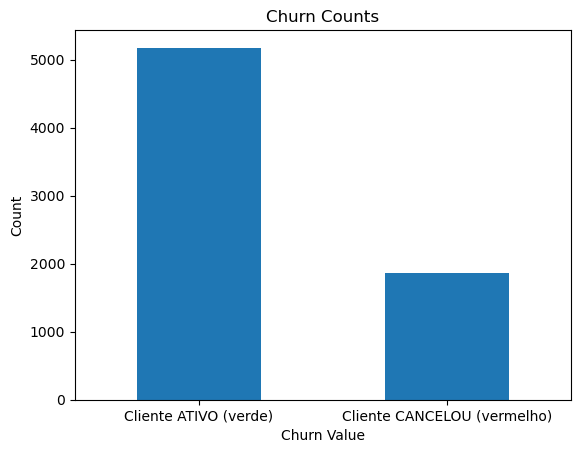

In [20]:
import matplotlib.pyplot as plt

churn_counts.plot(kind='bar')
plt.title('Churn Counts')
plt.xlabel('Churn Value')
plt.ylabel('Count')
plt.xticks([0, 1], ['Cliente ATIVO (verde)', 'Cliente CANCELOU (vermelho)'], rotation=0)
plt.show()


Apesar da maioria dos clientes serem verdes, os clientes que cancelaram formam mais de 2000 clientes e não vemos quase nenhum no mapa. Esquisito! Vamos plotar os pontos vermelho e verde com tamanhos diferentes, vamos colocar os pontos vermelhos com tamanho maior que o verde

In [21]:
import pandas as pd
import folium

# Assume df is your dataframe

# Let's create a base map centered at the average latitude and longitude
average_lat = df['Latitude'].mean()
average_long = df['Longitude'].mean()

m = folium.Map(location=[average_lat, average_long], zoom_start=10)

# Let's add a marker for each client
for index, row in df.iterrows():
    if row['Churn Value'] == 0:
        color = 'green'
        fill_opacity = 0.4  # Lower opacity for green dots
        radius = 5  # Smaller radius for green dots
    else:
        color = 'red'
        fill_opacity = 0.8  # Higher opacity for red dots
        radius = 7  # Larger radius for red dots
    folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                        radius=radius,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=fill_opacity
                        ).add_to(m)

# Save it to html
m.save('MAPA_tamanho_diferente.html')


Vemos que a maioria dos pontos verdes possuem uma borda vermelha, indicando que há pontos sobrepostos. Será que são apenas pontos muito próximos ou totalmente sobrepostos? Uma boa forma de resolvermos isso é contar quantas duplicadas o conjunto Latitude & Longitude possuem. 

In [23]:
# Create a new DataFrame that contains only the Latitude and Longitude columns
coordinates_df = df[['Lat Long']]

# Use duplicated to find duplicate rows. This will return a series of Booleans.
duplicate_coordinates = coordinates_df.duplicated(keep=False)

# Print the number of duplicated rows
num_duplicates = duplicate_coordinates.sum()
print(f"There are {num_duplicates} entries with duplicate coordinates.")



There are 7043 entries with duplicate coordinates.


7043 (>90%) são dados de Latitude, Longitude são duplicados! Vamos ver se existe alguma explicação lógica para isso, pode ser que sejam marido e esposa ou alguma situação similar... Printamos algumas linhas duplicadas para averiguar

In [14]:
# Create a DataFrame with only the duplicated rows
duplicated_df = df[duplicate_coordinates]

# Sort the DataFrame by latitude and longitude to ensure duplicates are next to each other
duplicated_df = duplicated_df.sort_values(by=['Latitude', 'Longitude'])

# Print the first two rows of the sorted DataFrame
print((duplicated_df))


             City  Zip Code                Lat Long   Latitude   Longitude  \
965    San Ysidro     92173  32.555828, -117.040073  32.555828 -117.040073   
2153   San Ysidro     92173  32.555828, -117.040073  32.555828 -117.040073   
3362   San Ysidro     92173  32.555828, -117.040073  32.555828 -117.040073   
5808   San Ysidro     92173  32.555828, -117.040073  32.555828 -117.040073   
7006   San Ysidro     92173  32.555828, -117.040073  32.555828 -117.040073   
...           ...       ...                     ...        ...         ...   
1663  Smith River     95567  41.950683, -124.097094  41.950683 -124.097094   
1727    Hornbrook     96044  41.962127, -122.527696  41.962127 -122.527696   
3029    Hornbrook     96044  41.962127, -122.527696  41.962127 -122.527696   
4252    Hornbrook     96044  41.962127, -122.527696  41.962127 -122.527696   
5469    Hornbrook     96044  41.962127, -122.527696  41.962127 -122.527696   

      Gender Senior Citizen Partner Dependents  Tenure Months  

# Dá para ver que são várias duplicadas com valores de outra variáveis completamente diferentes, não sendo passível de explicação razoável.

# A partir desta análise, concluímos que as variáveis de localização geográfica estão bastante corrompidas e decidimos não considerá-la na análises posteriores